Name : Jagadish

# Titanic Survival Prediction

   ○	Build a binary Logistic Regression Model with the dataset (Train Data & Test Data)


 Following are the must have things for submission of project :
 
 o	Proper EDA with explanation of impactful and useful varaibles
 o	Checking of Regression Assumptions
 o	Graphs wherever necessary
 o	Metrics for model evaluation:
 
       •	Confusion Matrix
       •	Accuracy Score
       •	F1 score, Precision, Recall, ROC-AUC 
       •	Model Optimization using K fold cross validation

 Also ensure that you use Train file for Training the model and Test file for testing the model

 ○ Consider column B (Survived) as the target (y) variable and rest of the columns as feature variables.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve

### Importing The Train Data

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We can see data have 891 rows and 12 columns.

### Basic Information of Data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Columns types

In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Columns Description

○ PassengerId

○ Survived :-> 0(Zero) means "No" and 1(One) means "Yes"

○ Pclass :-> Passenger/Ticket Class: 1st
                                     2nd
                                     3rd
                                     
○ Name

○ Sex :-> Male & Female

○ Age :-> Age in Years

○ SibSp :-> Of Siblings / Spouses aboard the Titanic Ship
                  The dataset defines family relations in this way:
                  
                  1. Sibling = Brother, Sister, Stepbrother, Stepsister
                  2. Spouse = Husband, Wife (Mistresses & Fiancés were ignored))
○ Parch :-> Of Parents / Children aboard the Titanic Ship
            The dataset defines family relations in this way:
            
                   Parent = mother, father
                   Child = daughter, son, stepdaughter, stepson
                   Some children travelled only with a Nanny, therefore parch=0 for them.
                   
○ Ticket :-> Ticket Number

○ Fare :-> Passenger Fare

○ Cabin :-> Cabin Number

○ Embarked :-> Port of Embarkation C, Q and S

### Data Preprocessing

##### Deleting some Columns which are not relavant for Analysis

That are : PassengerId, Ticket

In [5]:
train_data.drop(columns=['PassengerId', 'Ticket'], inplace=True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


We can see "PassengerId" and "Ticket" column have been dropped.

#### checking missing values of data

In [6]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

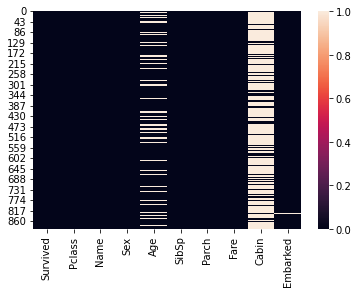

In [7]:
sns.heatmap(train_data.isnull())

The columns name Age has 177, Cabin has 687 and Emabarked has 2 missing values respectively.

##### Handling above columns which have missing values

In [8]:
### missing % in Cabin column
train_data["Cabin"].isnull().sum()*100/train_data.shape[0]

77.10437710437711

As we can see the "Cabin" column has 77% missing values so we drop this column since this column indicates cabin number which is not much significant for prediction model.

In [9]:
train_data.drop(columns=["Cabin"],inplace=True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


"Cabin" column has been deleted.

In [10]:
## Handling column "Embarked"

mo=train_data["Embarked"].mode()  ## since it is of categorical type so fill nan with its mode value
print(mo)
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0],inplace=True)  ## fill nan with its mode value

0    S
Name: Embarked, dtype: object


In [11]:
train_data["Age"].skew()   ## Age is positively skewed means it has outliers on right side

0.38910778230082704

In [12]:
## Handling Age Column

train_data["Age"].fillna(train_data["Age"].median(),inplace=True) ## since it is float type so fill nan with mean as it has outliers

### Now checking missing values again

In [13]:
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

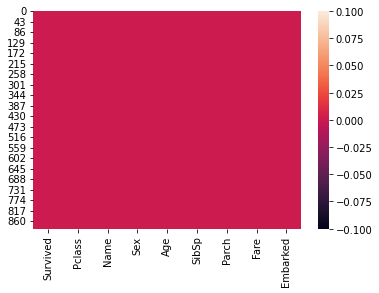

In [14]:
sns.heatmap(train_data.isnull())

We can see now Data is free from missing values.

### Label encoding of categorical data columns

In [15]:
train_data.select_dtypes(include='object')

,Name,Sex,Embarked
0,"Braund, Mr. Owen Harris",male,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,"Heikkinen, Miss. Laina",female,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S
4,"Allen, Mr. William Henry",male,S
...,...,...,...
886,"Montvila, Rev. Juozas",male,S
887,"Graham, Miss. Margaret Edith",female,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,S
889,"Behr, Mr. Karl Howell",male,C


In [16]:
print(train_data["Sex"].unique())
train_data["Sex"].replace({"male":0,"female":1},inplace=True)  ## label encoding

['male' 'female']


In [17]:
print(train_data["Embarked"].unique())
train_data["Embarked"].replace({"S":0,"C":1,"Q":2},inplace=True) ## lable encoding

['S' 'C' 'Q']


In [18]:
# now checking data types of columns
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

Now all columns are numeric type except Name.

### Adding new column name as family_members

In [19]:
df=train_data

df["family_members"]=df["SibSp"]+df["Parch"]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family_members
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0


In [20]:
# deleting "Parch" and "SibSp" columns 
df.drop(columns=["Parch","SibSp"],inplace= True)
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_members
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,0


### Insights from data considering all columns one by one

How many people survived and not survived ?

<AxesSubplot:xlabel='Survived', ylabel='count'>

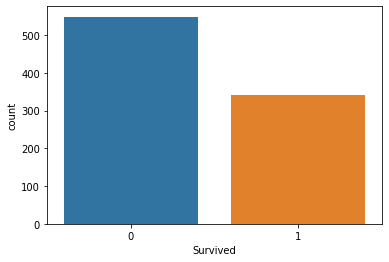

In [21]:
sns.countplot(df["Survived"])

In [22]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

###### Insight :

People died more as compare to survived.

#### Of which class Passengers Travelled more ?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

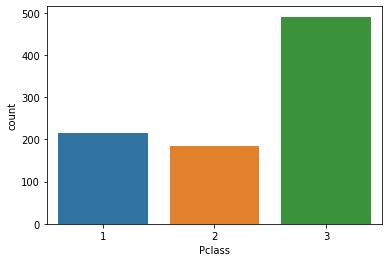

In [23]:
sns.countplot(df["Pclass"])

###### Insight :

Passengers of class 3 were more.

###### Of which class people survived most ?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

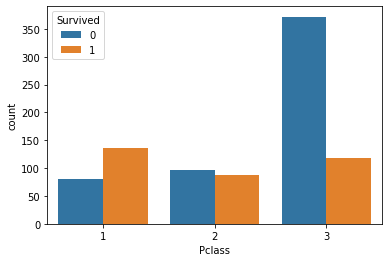

In [24]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [25]:
df.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

###### Insight :

Class 1 passengers survived most that is 136 and class 3rd passengers died more that is 372.

#### Fetching passengers counts based on their title

In [26]:
df['passengers_Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_members,passengers_Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,0,Mr


In [27]:
# view of passenger's title
df["passengers_Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: passengers_Title, dtype: int64

#### Passengers survived status based on their title

<AxesSubplot:xlabel='passengers_Title', ylabel='Survived'>

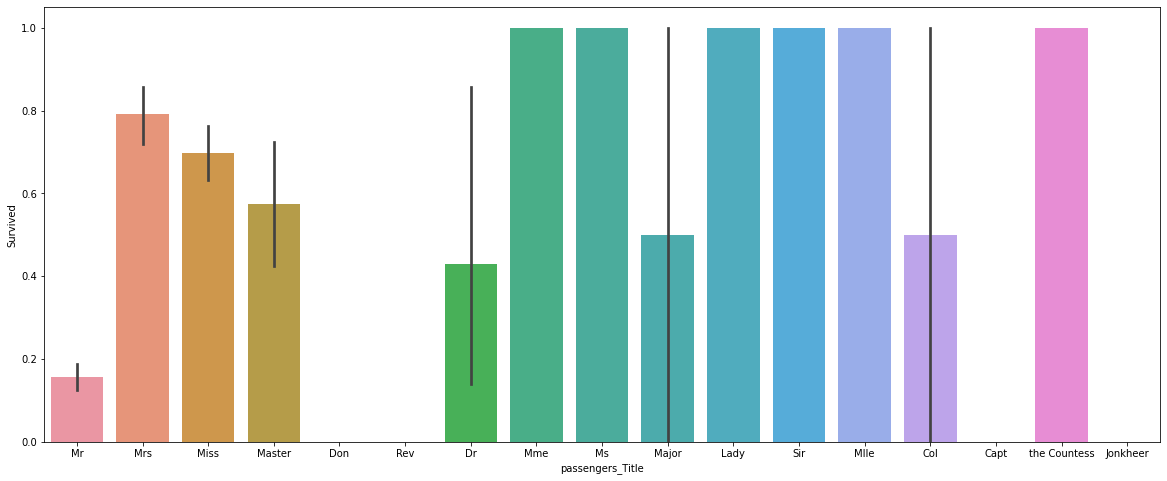

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(df["passengers_Title"], df["Survived"])

In [29]:
df.groupby("Survived")["passengers_Title"].value_counts()

Survived  passengers_Title
0         Mr                  436
          Miss                 55
          Mrs                  26
          Master               17
          Rev                   6
          Dr                    4
          Capt                  1
          Col                   1
          Don                   1
          Jonkheer              1
          Major                 1
1         Miss                127
          Mrs                  99
          Mr                   81
          Master               23
          Dr                    3
          Mlle                  2
          Col                   1
          Lady                  1
          Major                 1
          Mme                   1
          Ms                    1
          Sir                   1
          the Countess          1
Name: passengers_Title, dtype: int64

###### Insight :

○ Mostly male were passed away as maximum count was of "Mr".

○ 4 Doctors were passed away, 1 Captain was passed away and so on......

##### Finding Maximum, Minimum and Average Fare spent by passengers

In [30]:
df["Fare"].agg(["max","min","mean"])

max     512.329200
min       0.000000
mean     32.204208
Name: Fare, dtype: float64

#### Finding Maximum, Minimum and Average fare "Pclass" wise

In [31]:
df.groupby("Pclass")["Fare"].agg(["max","min","mean"])

,max,min,mean
Pclass,,,
1,512.3292,0.0,84.154687
2,73.5000,0.0,20.662183
3,69.5500,0.0,13.675550


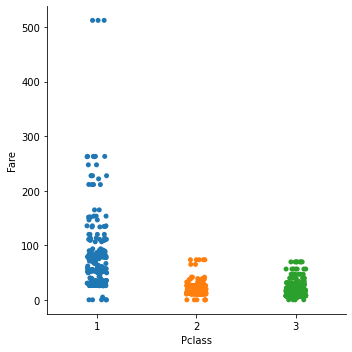

In [32]:
sns.catplot(x="Pclass",y="Fare",data=df)

###### Insight :

Fare spent by 1 pclass passengers was high.

#### Finding Maximum, Minimum and Average fare spent by Male & Female

In [33]:
df.groupby("Sex")["Fare"].agg(["max","min","mean"])

,max,min,mean
Sex,,,
0,512.3292,0.00,25.523893
1,512.3292,6.75,44.479818


###### Insight :

Average fare spent by Female was more than Male.

Note :->

1: female

0 : male

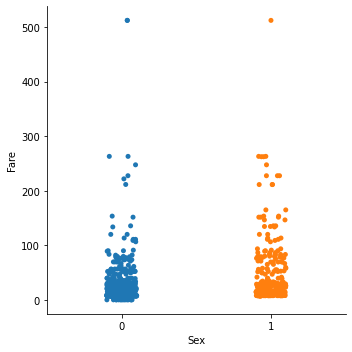

In [34]:
sns.catplot(x="Sex",y="Fare",data=df)

###### Insight :

Maximum fare spent by Male was more that is 2 Males spent maximum fare.

#### How many Male and Females have been survived or not ? Who survived most Male or Female ?

<AxesSubplot:xlabel='Sex', ylabel='count'>

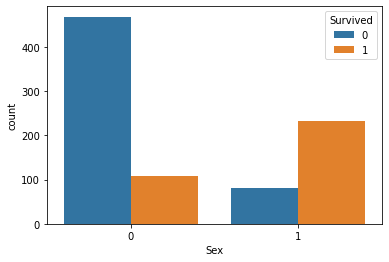

In [35]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [36]:
df.groupby("Sex")["Survived"].value_counts()

Sex  Survived
0    0           468
     1           109
1    1           233
     0            81
Name: Survived, dtype: int64

Insight : We can see Male(0) have been passed away more than Female(1).

##### Finding How many Males and Females survived of each class?

In [37]:
df.groupby(["Survived","Pclass"])["Sex"].value_counts()

Survived  Pclass  Sex
0         1       0       77
                  1        3
          2       0       91
                  1        6
          3       0      300
                  1       72
1         1       1       91
                  0       45
          2       1       70
                  0       17
          3       1       72
                  0       47
Name: Sex, dtype: int64

Insight : Male Class 3 had been passed away more that is 300.

#### Adding new column as "age_category"

In [38]:
df["age_category"] = pd.cut(df.Age, [0,14,25,60, np.inf], labels=['children','youth','adults',"senior_citizens"])
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_members,passengers_Title,age_category
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,1,Mr,youth
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,1,Mrs,adults
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,0,Miss,adults
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,1,Mrs,adults
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,0,Mr,adults


#### Passengers of which age group survived or not ?

<AxesSubplot:xlabel='age_category', ylabel='count'>

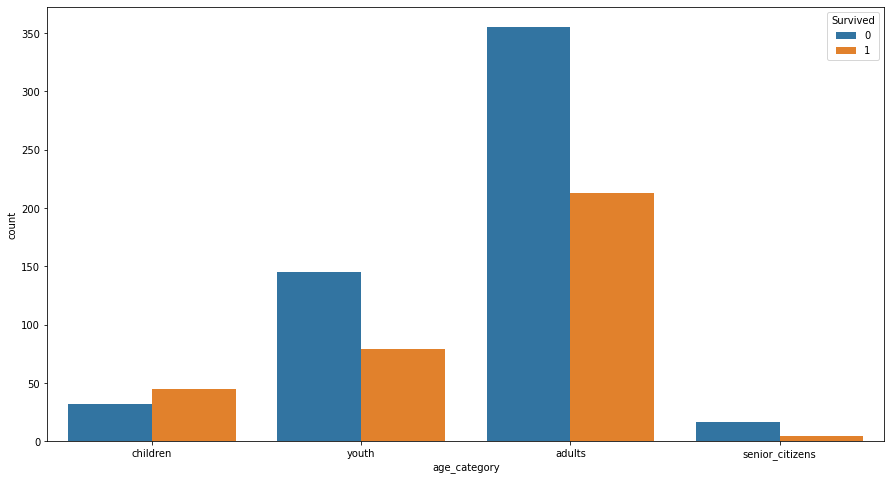

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(x='age_category', hue='Survived', data=df)

In [40]:
df.groupby("Survived")["age_category"].value_counts()

Survived                 
0         adults             355
          youth              145
          children            32
          senior_citizens     17
1         adults             213
          youth               79
          children            45
          senior_citizens      5
Name: age_category, dtype: int64

Insight : Mostly adults have been died.

#### Finding the number of survived with respect to family size

<AxesSubplot:xlabel='family_members', ylabel='count'>

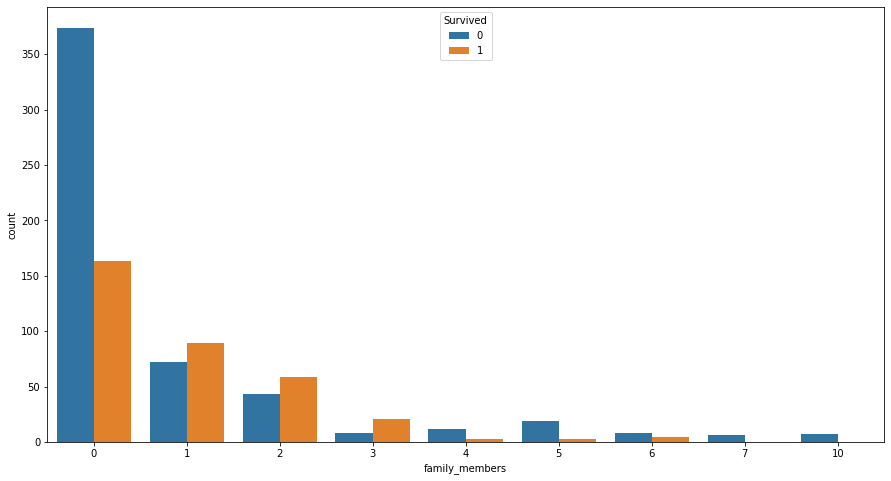

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(x='family_members', hue='Survived', data=df)

In [42]:
df.groupby(["Survived"])["family_members"].value_counts()

Survived  family_members
0         0                 374
          1                  72
          2                  43
          5                  19
          4                  12
          3                   8
          6                   8
          10                  7
          7                   6
1         0                 163
          1                  89
          2                  59
          3                  21
          6                   4
          4                   3
          5                   3
Name: family_members, dtype: int64

Insight :
    
The passengers who travelled alone had been died more.

##### Embarked implies where the traveller mounted from.

S: Southampton -> 0

C: Cherbourg -> 1

Q: Queenstown -> 2

##### Visualization of Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

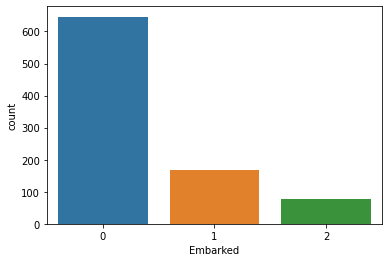

In [43]:
sns.countplot(x="Embarked", data=df)

In [44]:
df["Embarked"].value_counts()*100/len(df["Embarked"])

0    72.502806
1    18.855219
2     8.641975
Name: Embarked, dtype: float64

Insight : Mostly people boarded from S that is 72%, 18% from C and very low 8% from Q.

### Feature Engineering

In [45]:
# View of Train Data
train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_members,passengers_Title,age_category
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,1,Mr,youth
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,1,Mrs,adults
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,0,Miss,adults
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,1,Mrs,adults
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,0,Mr,adults


#### Drop columns "Name", "passengers_Title" and "age_category" as they seems not relevant for prediction model

In [46]:
train_data.drop(columns=["Name","passengers_Title","age_category"],inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_members
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,0,1
4,0,3,0,35.0,8.0500,0,0


#### checking distribution of Data

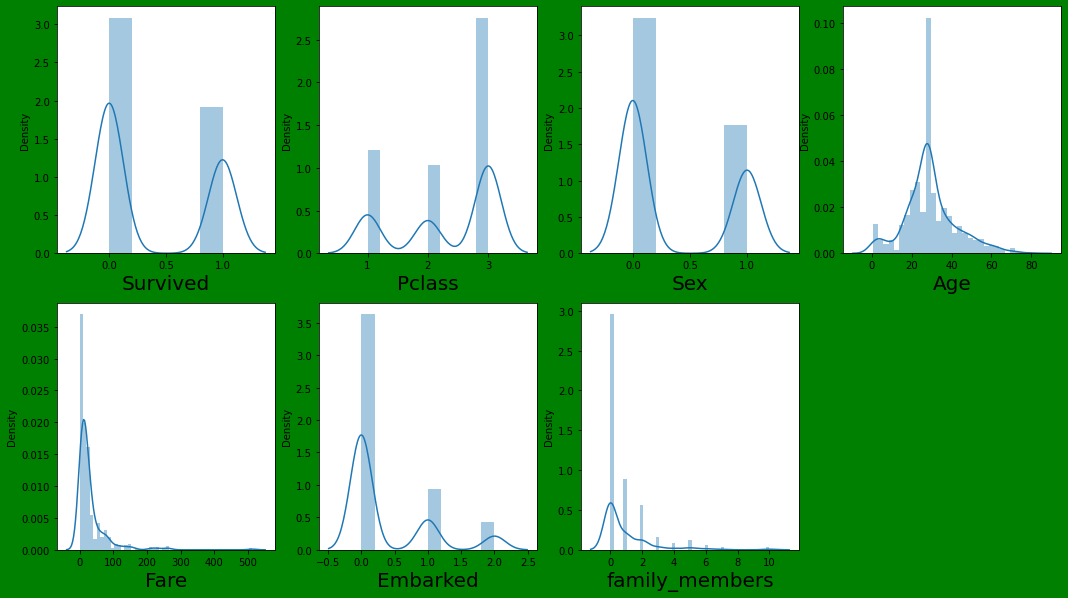

In [47]:
plt.figure(figsize=(18,10), facecolor='green')
plotnumber = 1

for column in train_data.columns:
    if plotnumber < 8 :    ## 7 columns in data 
        plt.subplot(2,4,plotnumber)     ## 2 : rows , 4: columns , plotnumber : position of plot
        sns.distplot(train_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data.

### checking skewness using skew() function

In [48]:
train_data.skew()

Survived          0.478523
Pclass           -0.630548
Sex               0.618921
Age               0.510245
Fare              4.787317
Embarked          1.543397
family_members    2.727441
dtype: float64

### checking outliers using describe() function

In [49]:
# statistical summary
train_data.describe().T   ## T : Transpose

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Embarked,891.0,0.361392,0.635673,0.00,0.0000,0.0000,1.0,2.0000
family_members,891.0,0.904602,1.613459,0.00,0.0000,0.0000,1.0,10.0000


From above statistical summary we can see there is big jump from 75% to max (31 to 512 ) in Fare and 35 to 80 in Age so Fare and Age have outliers

### Checking outliers using Boxplot

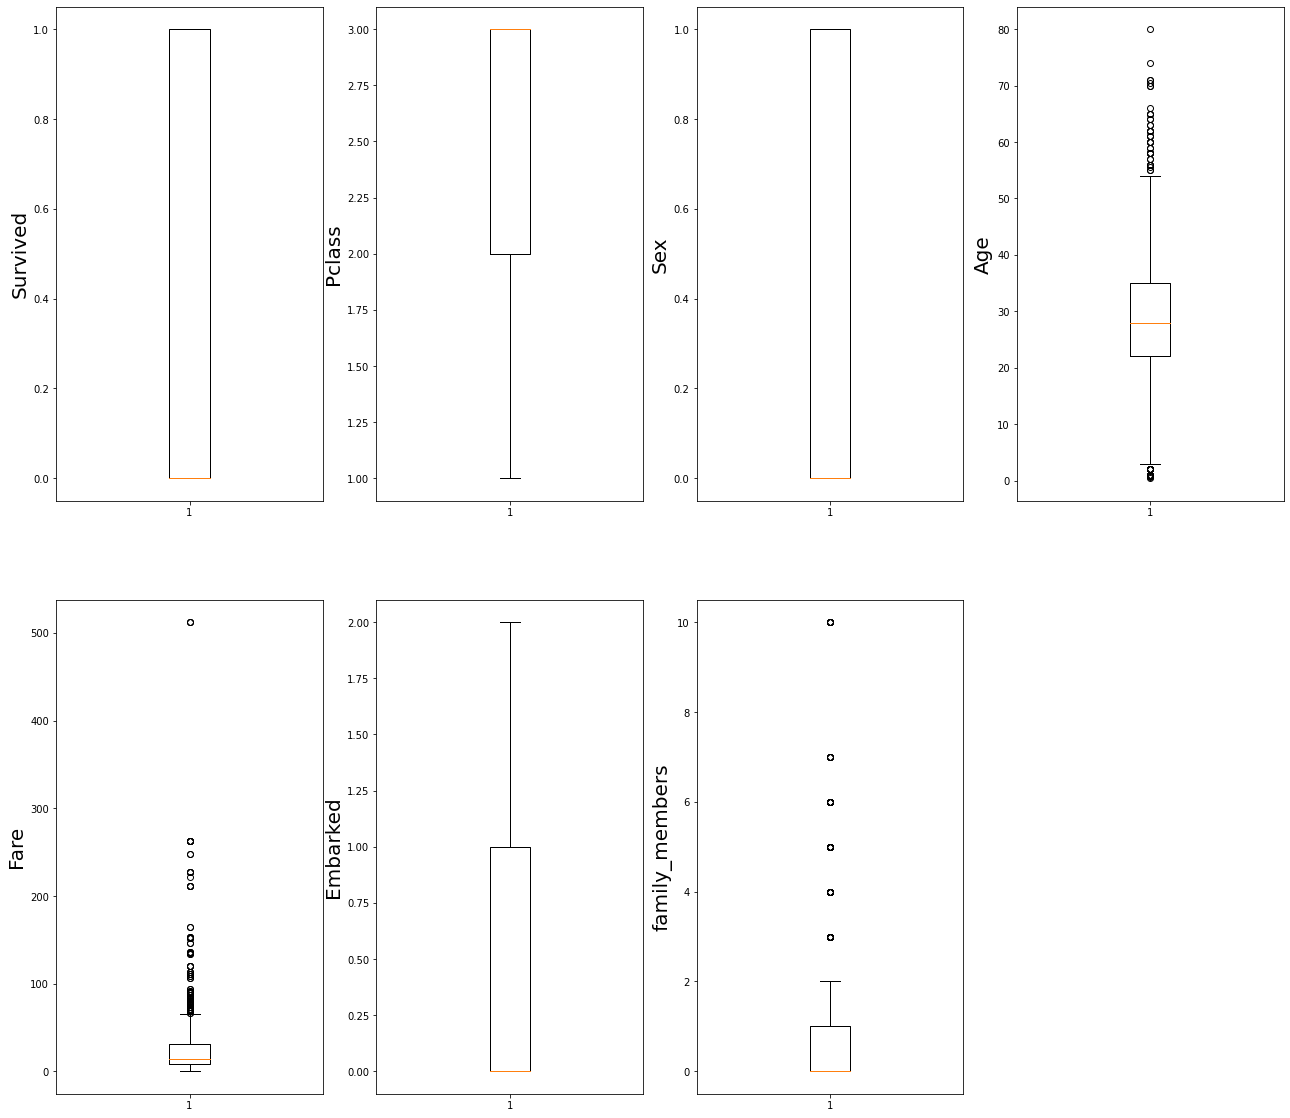

In [50]:
plt.figure(figsize=(22,20))

plotnumber=1
for column in train_data.columns:
    if plotnumber < 8 :     # as there are 7 columns in the data
        plt.subplot(2,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(train_data[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Handling outliers of Age Column

IQR_upper_limit for column Age  54
IQR_lower_limit for column Age  2
outliers on right side in Age is  11     58.0
15     55.0
33     66.0
54     65.0
94     59.0
96     71.0
116    70.5
152    55.5
170    61.0
174    56.0
195    58.0
232    59.0
252    62.0
268    58.0
275    63.0
280    65.0
326    61.0
366    60.0
438    64.0
456    65.0
467    56.0
483    63.0
487    58.0
492    55.0
493    71.0
545    64.0
555    62.0
570    62.0
587    60.0
625    61.0
626    57.0
630    80.0
647    56.0
659    58.0
672    70.0
684    60.0
694    60.0
745    70.0
772    57.0
829    62.0
851    74.0
879    56.0
Name: Age, dtype: float64 

outliers on left side in Age is  78     0.83
164    1.00
172    1.00
183    1.00
305    0.92
381    1.00
386    1.00
469    0.75
644    0.75
755    0.67
788    1.00
803    0.42
827    1.00
831    0.83
Name: Age, dtype: float64 



{'whiskers': [<matplotlib.lines.Line2D at 0x28ab43487c0>,
 'caps': [<matplotlib.lines.Line2D at 0x28ab4349c30>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ab4349270>],
 'medians': [<matplotlib.lines.Line2D at 0x28ab4349f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ab434a3b0>],
 'means': []}

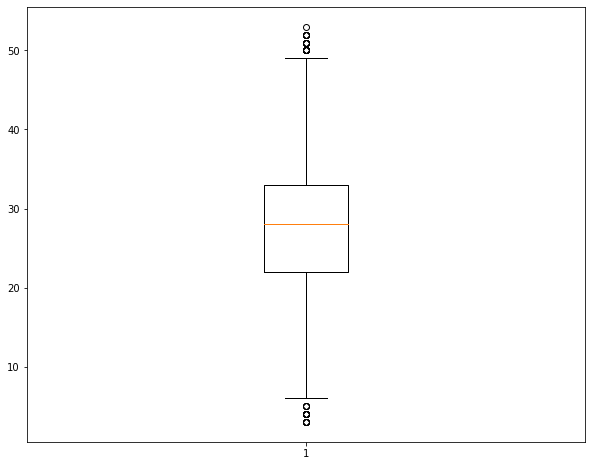

In [51]:
q3=train_data["Age"].quantile(q=0.75)
q1=train_data["Age"].quantile(q=0.25)
IQR=q3-q1

## Deriving bounderies of outliers

IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)

print("IQR_upper_limit for column Age ",IQR_upper_limit)
print("IQR_lower_limit for column Age ",IQR_lower_limit)

## find and treating outliers-both lower and upper end

k1=train_data[train_data["Age"]>IQR_upper_limit]
k2=train_data[train_data["Age"]<IQR_lower_limit]

print("outliers on right side in Age is ",k1["Age"],"\n")
print("outliers on left side in Age is ",k2["Age"],"\n")

data_cleaned = train_data[(df["Age"]<IQR_upper_limit) & (train_data["Age"]>IQR_lower_limit)]

# View Boxplot
plt.figure(figsize=(10,8))
plt.boxplot(data_cleaned["Age"])

### Handling outliers of "Fare" Column

IQR_upper_limit for column Fare  63
IQR_lower_limit for column Fare  -25
outliers on right side in Fare is  1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
835     83.1583
846     69.5500
849     89.1042
856    164.8667
863     69.5500
Name: Fare, Length: 105, dtype: float64 



{'whiskers': [<matplotlib.lines.Line2D at 0x28ab4281ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x28ab42824d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ab4283d60>],
 'medians': [<matplotlib.lines.Line2D at 0x28ab4281e70>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ab4282140>],
 'means': []}

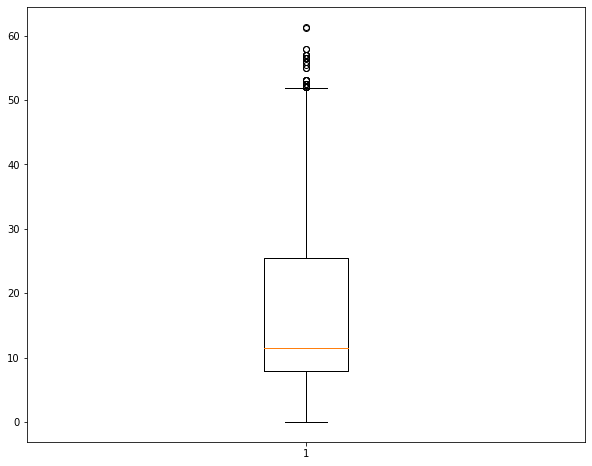

In [52]:
q3=data_cleaned["Fare"].quantile(q=0.75)
q1=data_cleaned["Fare"].quantile(q=0.25)
IQR=q3-q1

## Deriving bounderies of outliers
    
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)

print("IQR_upper_limit for column Fare ",IQR_upper_limit)
print("IQR_lower_limit for column Fare ",IQR_lower_limit)

## find and treating outliers-both lower and upper end

k1=data_cleaned[data_cleaned["Fare"]>IQR_upper_limit]
print("outliers on right side in Fare is ",k1["Fare"],"\n")

data_cleaned=data_cleaned[data_cleaned["Fare"]<IQR_upper_limit]

# View Boxplot
plt.figure(figsize=(10,8))
plt.boxplot(data_cleaned["Fare"])

In [53]:
data_cleaned

,Survived,Pclass,Sex,Age,Fare,Embarked,family_members
0,0,3,0,22.0,7.2500,0,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,0,1
4,0,3,0,35.0,8.0500,0,0
5,0,3,0,28.0,8.4583,2,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,0
887,1,1,1,19.0,30.0000,0,0
888,0,3,1,28.0,23.4500,0,3
889,1,1,0,26.0,30.0000,1,0


After removing outliers the size of training data has been reduced.

### Now, checking distribution of data again.

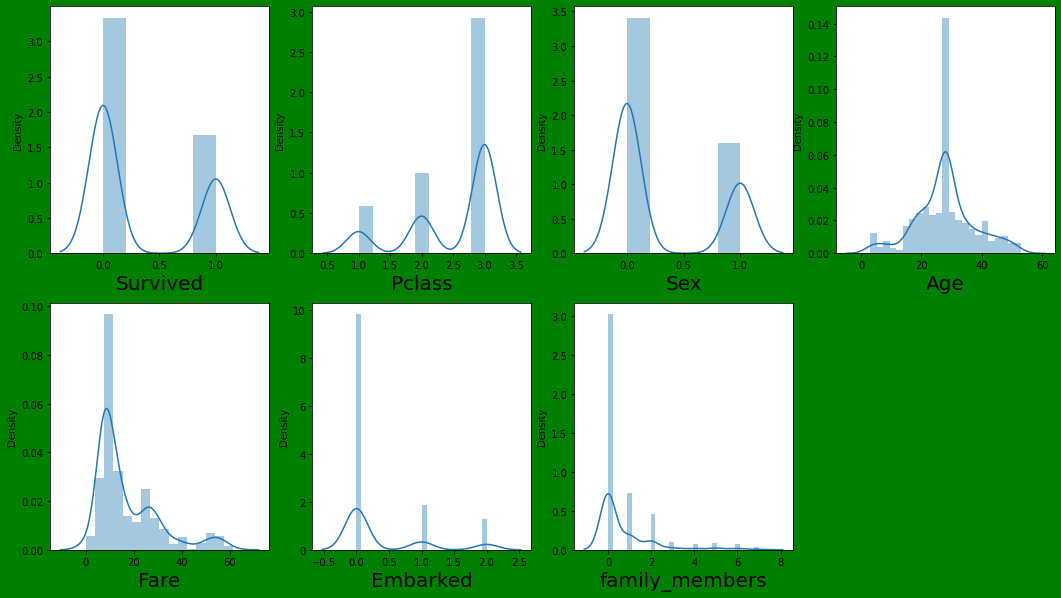

In [54]:
plt.figure(figsize=(18,10), facecolor='green')
plotnumber = 1

for column in data_cleaned.columns:
    if plotnumber < 8 :        ## 8 columns in data 
        plt.subplot(2,4,plotnumber)   ## 2 : rows , 4: columns , plotnumber : position of plot
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

As we can see the data looks much better now than before.

#### Relationship of features with target and with each other using pairplot

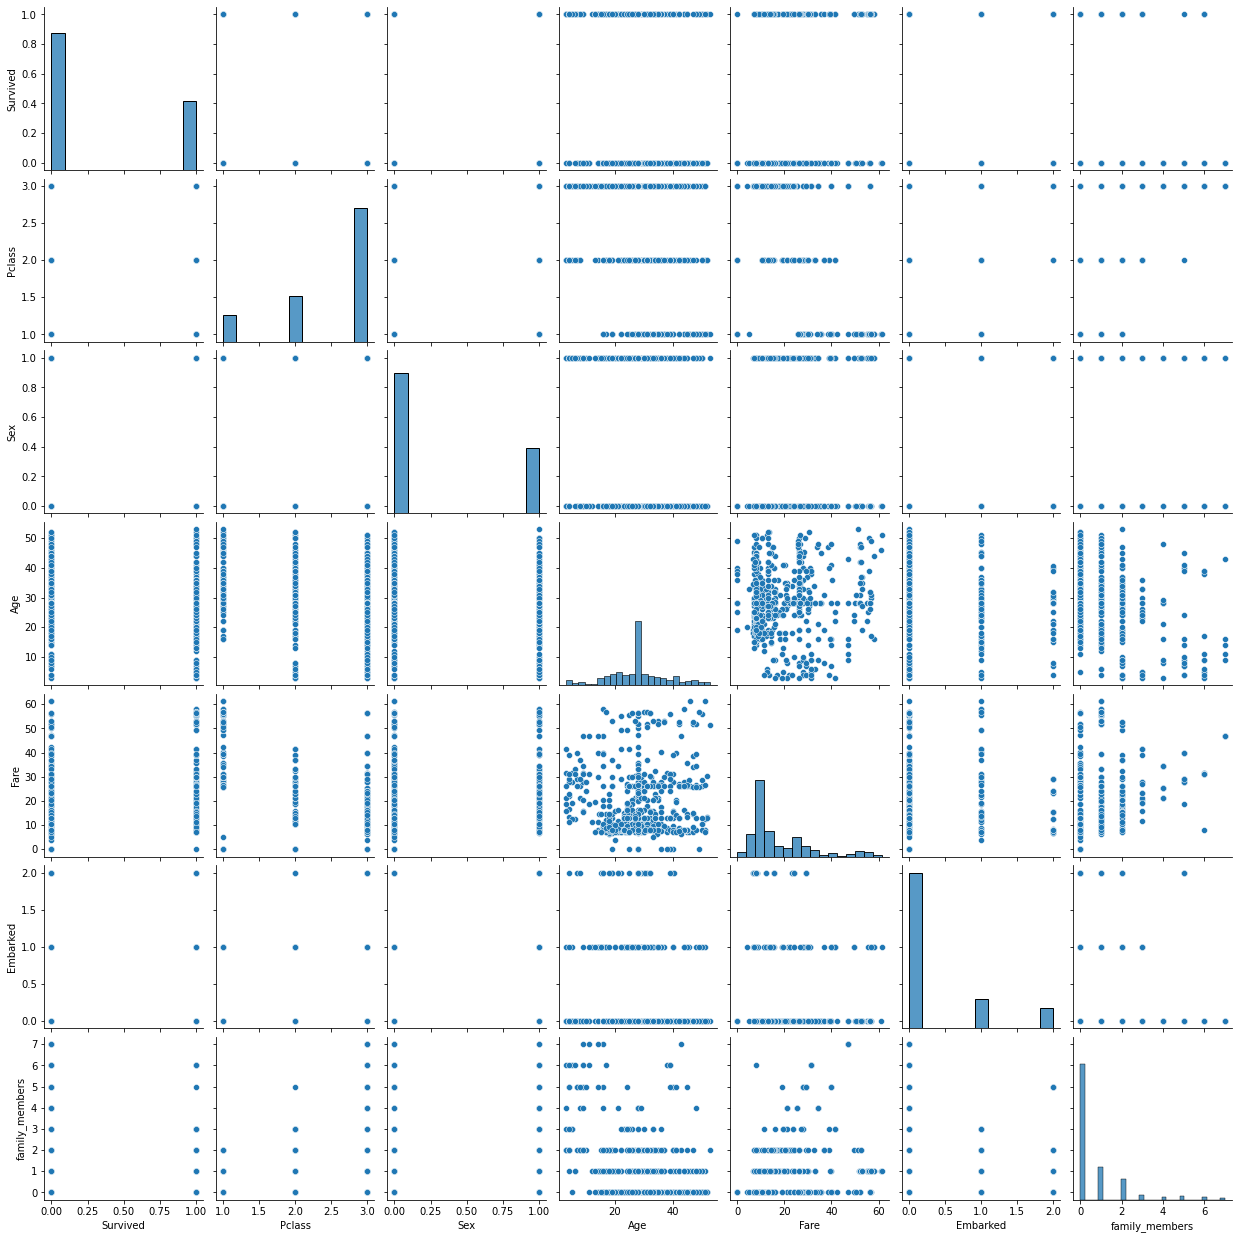

In [55]:
## scatter plots using pairplot
sns.pairplot(data_cleaned)

### Feature Selection :
       ○ Correlation

       ○ Multicollinearity

##### Correlation

<AxesSubplot:>

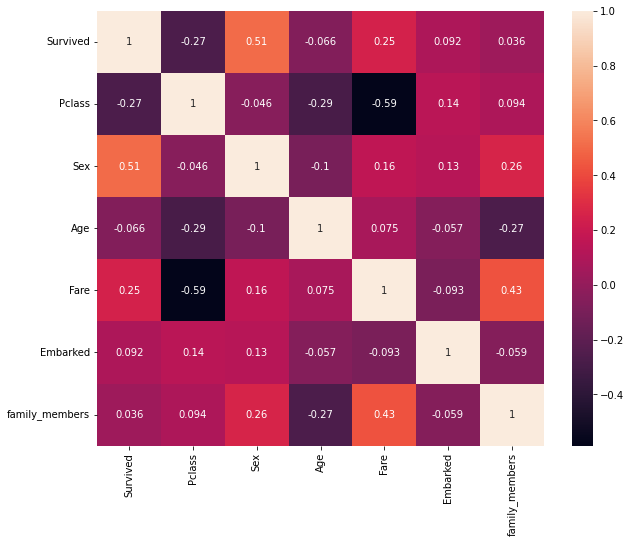

In [56]:
plt.figure(figsize=(10,8))
corr = data_cleaned.corr()
sns.heatmap(corr,annot=True)

All features are not highly correlated with target feature that is "Survived" so we can consider all features.

### Checking Multicollinearity in the features
For Multicollinearity we need to do Scaling first on features so seggregate features and target as follows

In [57]:
x = data_cleaned.drop(columns="Survived")
x ## features

,Pclass,Sex,Age,Fare,Embarked,family_members
0,3,0,22.0,7.2500,0,1
2,3,1,26.0,7.9250,0,0
3,1,1,35.0,53.1000,0,1
4,3,0,35.0,8.0500,0,0
5,3,0,28.0,8.4583,2,0
...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0
887,1,1,19.0,30.0000,0,0
888,3,1,28.0,23.4500,0,3
889,1,0,26.0,30.0000,1,0


In [58]:
y = data_cleaned["Survived"]
y ## target

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 712, dtype: int64

### Scaling of features

In [59]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.67390242, -0.68413539, -0.60055718, -0.74741446, -0.527744  ,
         0.19828043],
       [ 0.67390242,  1.46169897, -0.19068734, -0.6959702 , -0.527744  ,
        -0.5331997 ],
       [-2.13205385,  1.46169897,  0.7315198 ,  2.74698468, -0.527744  ,
         0.19828043],
       ...,
       [ 0.67390242,  1.46169897,  0.01424758,  0.48724783, -0.527744  ,
         1.66124068],
       [-2.13205385, -0.68413539, -0.19068734,  0.98644771,  1.00594468,
        -0.5331997 ],
       [ 0.67390242, -0.68413539,  0.42411742, -0.7093076 ,  2.53963336,
        -0.5331997 ]])

#### Computing VIF(Variance Inflation Factor) for detecting multicollinearity

In [60]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,2.073253,Pclass
1,1.110006,Sex
2,1.171075,Age
3,2.383923,Fare
4,1.057658,Embarked
5,1.745946,family_members


VIF(Variance Inflation Factor) of all features are less than 5 so we consider all features as relavant features for modelling.

### Building Prediction Model using Logistic Regression

##### Dividing the Data as 80% for training and 20% for test data as follows :

In [61]:
X = x_scaled
Y = y

# spliting
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.20, random_state = 0)

#### Checking shape of train and test data

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(569, 6)
(569,)
(143, 6)
(143,)


### Model building using Logistic Regression

In [63]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

### Model prediction on test data

In [64]:
x_test
len(x_test)
## test data : features

143

In [65]:
## prediction of test data
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

### Model Evaluation Metrics

#### Confusion Matrix

In [66]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[81,  8],
       [20, 34]], dtype=int64)

#### Accuracy

In [67]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8041958041958042

#### Precision

In [68]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
Precision

0.9101123595505618

#### Recall

In [69]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.801980198019802

#### F1 Score

In [70]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8526315789473684

#### ROC/AUC

In [71]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7698709945900958

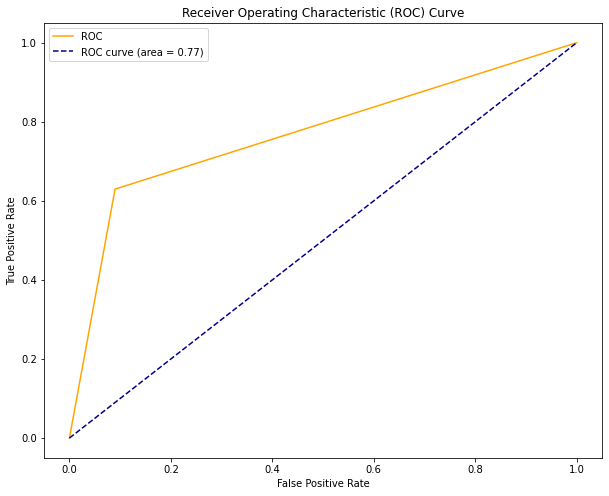

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### k-Fold Cross Validation

In [73]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.74561404 0.76315789 0.79824561 0.78947368 0.84070796]


#### We can summarize the cross-validation accuracy by calculating its mean.

In [74]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7874


MODEL EVALUATION SUMMARY :
    
    Model accuracy : 80.41%
    Precision      : 0.9101
    Recall         : 0.8019
    F1 Score       : 0.8526
    AUC            : 0.7698
    K-Fold         : 0.7874

### Conclusion :

Here, I used Logistic regression algorithm for prediction and got 80.41% accuracy and 0.8526 F1 Score, 0.7698 AUC and K-Fold 0.7874.

# PREDICTIONS ON TEST DATA

#### Importing Test Data

In [75]:
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Preparing Test Data for Prediction

In [76]:
# Deleting some columns as we did in training data

test_data.drop(columns=["Name","Ticket"],inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


#### Checking Missing Values of Test Data

<AxesSubplot:>

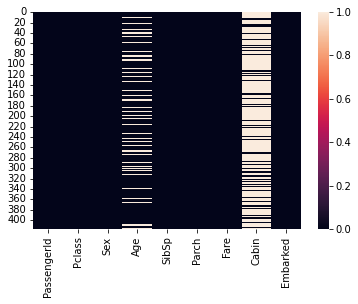

In [77]:
# view of missing values
sns.heatmap(test_data.isnull())

In [78]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Insight : We can see Column Age(86), Fare(1), Cabin(327) have missing values respectively.

In [79]:
# missing values % in Cabin column
test_data["Cabin"].isnull().sum()*100/df.shape[0]

36.7003367003367

In [80]:
## deleting Cabin column as it has more missing values and seems not relevant for predict 
test_data.drop(columns=["Cabin"],inplace=True)

In [81]:
# Handling Column Age
test_data["Age"].fillna(test_data["Age"].mean(),inplace=True) ## since it is float type so fill nan with mean

In [82]:
# Handling Column Fare
test_data["Fare"].fillna(test_data["Fare"].mean(),inplace=True)

In [83]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


#### Checking Missing values again

<AxesSubplot:>

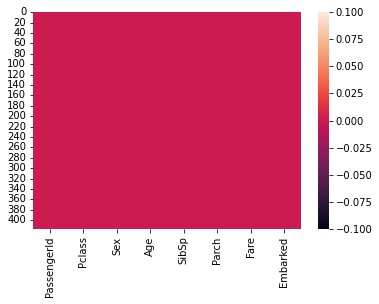

In [84]:
sns.heatmap(test_data.isnull())

In [85]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

As we can see missing values have been filled

#### Label Encoding of categorical data

In [86]:
# checking object types
test_data.select_dtypes(include='object')

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


Insight : Column "Sex" and "Embarked" have categorical values.

In [87]:
## label encoding

test_data["Sex"].replace({"male":0,"female":1},inplace=True)
print(test_data["Sex"].unique())

[0 1]


Encoded - Male   : 0 and Female : 1

In [88]:
print(test_data["Embarked"].unique())

['Q' 'S' 'C']


In [89]:
test_data["Embarked"].replace({"S":0,"C":1,"Q":2},inplace=True) ## lable encoding

In [90]:
print(test_data["Embarked"].unique())

[2 0 1]


#### Adding column name family_size as we did in Train Data

In [91]:
test_data["family_members"] = test_data["SibSp"] + test_data["Parch"]
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,1
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,2


In [92]:
test_data.drop(columns=["Parch","SibSp"],inplace= True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,family_members
0,892,3,0,34.5,7.8292,2,0
1,893,3,1,47.0,7.0000,0,1
2,894,2,0,62.0,9.6875,2,0
3,895,3,0,27.0,8.6625,0,0
4,896,3,1,22.0,12.2875,0,2


In [93]:
f_test=test_data.drop(columns=["PassengerId"])
f_test.shape

(418, 6)

In [94]:
p_id=test_data["PassengerId"]
p_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

#### Checking shape of Training and Test Data

In [95]:
# training data : features(in scaled form)
X

array([[ 0.67390242, -0.68413539, -0.60055718, -0.74741446, -0.527744  ,
         0.19828043],
       [ 0.67390242,  1.46169897, -0.19068734, -0.6959702 , -0.527744  ,
        -0.5331997 ],
       [-2.13205385,  1.46169897,  0.7315198 ,  2.74698468, -0.527744  ,
         0.19828043],
       ...,
       [ 0.67390242,  1.46169897,  0.01424758,  0.48724783, -0.527744  ,
         1.66124068],
       [-2.13205385, -0.68413539, -0.19068734,  0.98644771,  1.00594468,
        -0.5331997 ],
       [ 0.67390242, -0.68413539,  0.42411742, -0.7093076 ,  2.53963336,
        -0.5331997 ]])

In [96]:
# Training data : target variable
Y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [97]:
print(X.shape)  ## X : training data : features
print(Y.shape)  ## Y:  training data : target
print(f_test.shape)  ## test data : features

(712, 6)
(712,)
(418, 6)


### Modelling using logistic Regression Algorithm

In [98]:
log_reg = LogisticRegression()

log_reg.fit(X,Y)

LogisticRegression()

### Predicting the values for Test Data

In [99]:
# scaling of f_test

scalar = StandardScaler()
f_test_scaled = scalar.fit_transform(f_test)
f_test_scaled

array([[ 0.87348191, -0.75592895,  0.3349926 , -0.49840706,  2.24316522,
        -0.5534426 ],
       [ 0.87348191,  1.32287566,  1.32553003, -0.51327429, -0.6778412 ,
         0.10564289],
       [-0.31581919, -0.75592895,  2.51417495, -0.46508846,  2.24316522,
        -0.5534426 ],
       ...,
       [ 0.87348191, -0.75592895,  0.65196458, -0.50879189, -0.6778412 ,
        -0.5534426 ],
       [ 0.87348191, -0.75592895,  0.        , -0.4944482 , -0.6778412 ,
        -0.5534426 ],
       [ 0.87348191, -0.75592895,  0.        , -0.23790598,  0.78266201,
         0.76472838]])

In [100]:
# finally prediction of test data

test_pred = log_reg.predict(f_test_scaled)
test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Making Dataframe which contains "Passenger Id" and prediction "Survived" of Test Data

In [101]:
d_frame = {'Passenger Id': p_id, 'Survived': test_pred} 
     
prediction_df = pd.DataFrame(d_frame)
prediction_df

,Passenger Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Saving the dataframe to "Titanic_Survived.csv"  file

In [102]:
prediction_df.to_csv('Titanic_Survived.csv')

                                                   •••♦♦♦•••